# Introduction to this pytho notebook

In [ ]:
"""
What? Monotonic constraints

By imposing a positive (increasing) or negative (decreasing) constraint on the features during the learning process, 
the estimator is able to properly follow the general trend instead of being subject to the variations.

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_monotonic_constraints.html#sphx-glr-auto-examples-ensemble-plot-monotonic-constraints-py
"""

# Import python modules

In [13]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import plot_partial_dependence
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib import pyplot

# Create synthetic dataset

In [ ]:
"""
We build an artificial dataset where the target value is in general positively correlated with the first 
feature (with some random and non-random variations), and in general negatively correlated with the second feature.
"""

In [2]:
rng = np.random.RandomState(0)

n_samples = 5000
# positive correlation with y
f_0 = rng.rand(n_samples)  
# negative correlation with y
f_1 = rng.rand(n_samples)  

X = np.c_[f_0, f_1]
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = (5 * f_0 + np.sin(10 * np.pi * f_0) -
     5 * f_1 - np.cos(10 * np.pi * f_1) +
     noise)

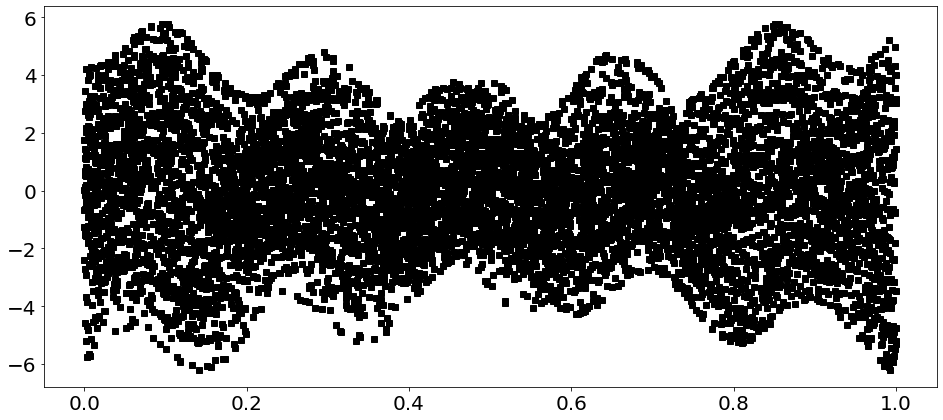

In [17]:
pyplot.plot(X, y, "sk")

# Build the model

In [ ]:
"""
Histogram-based Gradient Boosting Regression Tree. This estimator is much faster than GradientBoostingRegressor 
for big datasets (n_samples >= 10 000). This estimator has native support for missing values (NaNs).
"""

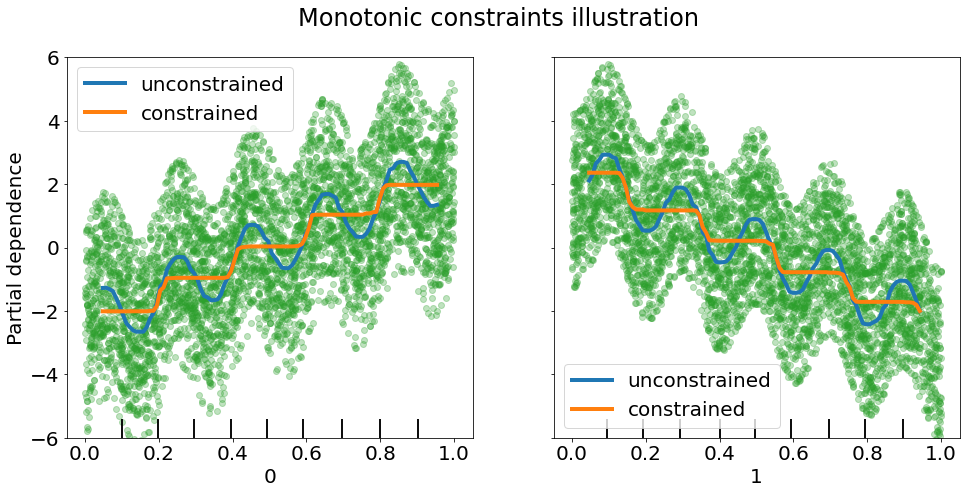

In [15]:
rcParams['figure.figsize'] = 16, 7
rcParams['font.size'] = 20
fig, ax = plt.subplots()

# Without any constraint
gbdt = HistGradientBoostingRegressor()
gbdt.fit(X, y)
disp = plot_partial_dependence(
    gbdt, X, features=[0, 1],
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
    ax=ax,
)

# With positive and negative constraints
gbdt = HistGradientBoostingRegressor(monotonic_cst=[1, -1])
gbdt.fit(X, y)

plot_partial_dependence(
    gbdt,
    X,
    features=[0, 1],
    feature_names=(
        "First feature\nPositive constraint",
        "Second feature\nNegtive constraint",
    ),
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)

for f_idx in (0, 1):
    disp.axes_[0, f_idx].plot(
        X[:, f_idx], y, "o", alpha=0.3, zorder=-1, color="tab:green"
    )
    disp.axes_[0, f_idx].set_ylim(-6, 6)

plt.legend()
fig.suptitle("Monotonic constraints illustration")

plt.show()

In [ ]:
"""
By imposing a positive (increasing) or negative (decreasing) constraint on the features during the learning process, 
the estimator is able to properly follow the general trend instead of being subject to the variations.
"""